In [2]:
import sleap

import matplotlib.pyplot as plt
import cv2

import scipy

from pathlib import Path

import numpy as np

# Data definition

In [2]:
#labels = sleap.Labels.load_file("/Users/ulric/Documents/Documents/MaximeModel/LabeledFrames.train.pkg.slp")
labels = sleap.Labels.load_file("/mnt/labserver/DURRIEU_Matthias/Code/Sleap_Pretrained_Maxime/LabeledFrames.train.pkg.slp")

In [3]:
# Get first frame

frame0 = labels[0]

In [4]:
# Get instances

instances = frame0.instances

instances

[Instance(video=Video(filename=/mnt/upramdya_data/_Tracking_models/Sleap/mazerecorder/FlyTracking/FullBody/231129_TNT_Fine_2_Videos_Tracked/arena1/corridor1/corridor1.mp4, shape=(104402, 560, 94, 1), backend=MediaVideo), frame_idx=2061, points=[Head: (54.6, 485.3), Thorax: (54.0, 475.4), Abdomen: (50.9, 457.9), Rfront: (47.6, 495.4), Lfront: (79.0, 482.3), Rmid: (46.1, 475.2), Lmid: (71.2, 461.4), Rhind: (49.6, 462.1), Lhind: (66.1, 450.9), Rwing: (45.1, 438.3), Lwing: (48.4, 438.4)], track=None)]

In [5]:
pts = instances[0].points

In [6]:
array = instances[0].numpy()

array

rec.array([[ 54.64449636, 485.28501254],
           [ 54.00946559, 475.44976474],
           [ 50.85038527, 457.91227244],
           [ 47.57402837, 495.36900952],
           [ 79.00987821, 482.32325002],
           [         nan,          nan],
           [ 71.16817276, 461.41458146],
           [         nan,          nan],
           [ 66.12280077, 450.91851349],
           [ 45.1279229 , 438.27958194],
           [ 48.35314456, 438.36257846]],
          dtype=float64)

In [7]:
# Add a new value to the array

array = np.append(array, [0,0])

In [8]:
instances[0].pts = sleap.Instance.from_numpy(array, skeleton=labels.skeletons[0])


IndexError: invalid index to scalar variable.

In [ ]:
array

In [ ]:
instances[5].points[0].y

In [ ]:
frame1 = labels[1]
instances1 = frame1.instances
instances1

In [ ]:
# Sort instances by y position
instances1.sort(key=lambda x: x[0].y)
instances1
#instances.sort(key=lambda x: x.centroid[1])

In [ ]:
labels[1].instances

Notes : 1) It's fairly easy to sort flies instances by their y positions 2) because the subvariables (ex: instances) are symlinked to the original label variable, the orginial can be edited by editing the subvariable.

In [ ]:
len(labels)

In [ ]:
for f in range(len(labels)):
    labels[f].instances.sort(key=lambda x: x[0].y)

In [ ]:
labels[10].plot()

In [ ]:
frame_0 = labels[0]

frame_0

In [ ]:
img = frame_0.image

img.shape

In [ ]:
# Reshape img to a 832x832 image
img_shaped = img[0:832, 0:832]

plt.imshow(img_shaped, cmap='gray')

# Comparison with cropped video

In [ ]:
CropPath = '/Users/ulric/Movies/TrainingVids/Crops/Arena1/Arena1.mp4'
# Display the frame 6254 of the video CropPath
cap = cv2.VideoCapture(CropPath)
cap.set(1, 6254)
ret, frame = cap.read()
plt.imshow(frame)


Looking good, do the same with arena 4 which is slightly more distinguishable

In [ ]:
CropPath4 = '/Users/ulric/Movies/TrainingVids/Crops/Arena4/Arena4.mp4'
# Display the frame 6254 of the video CropPath
cap = cv2.VideoCapture(CropPath4)
cap.set(1, 6254)
ret, frame = cap.read()
plt.imshow(frame)

Below I tested shifting by 6 frames, let's see if this is consistent

In [ ]:
cap = cv2.VideoCapture(CropPath4)
cap.set(1, 6254-6)
ret, frame = cap.read()
plt.imshow(frame)

Seems to be! Then shift everything by 6 frames should be simpler than working on subsets of the videos.

 Let's check the arena 5

In [ ]:
CropPath5 = '/Users/ulric/Movies/TrainingVids/Crops/Arena5/Arena5.mp4'
# Display the frame 6254 of the video CropPath
cap = cv2.VideoCapture(CropPath5)
cap.set(1, 6254)
ret, frame = cap.read()
plt.imshow(frame)

Might be some inconsistency during the writing process. Then better strategy is to use the cropping parameters and generate the cropped frames from the original labeled frames.

In [ ]:
frame_1 = labels[1]

frame_1

img = frame_1.image

img_shaped = img[0:832, 0:832]

plt.imshow(img_shaped, cmap='gray')

In [ ]:
CropPath = '/Users/ulric/Movies/TrainingVids/Crops/Arena1/Arena1.mp4'
# Display the frame corresponding to the frame_1 idx of the video CropPath
cap = cv2.VideoCapture(CropPath)
cap.set(1, frame_1.frame_idx-6)
ret, frame = cap.read()
plt.imshow(frame)


There are 6 frames discrepancy between the original and the cropped frames. This is due to the fact that the cropping is done on the original frames, while the labeled frames are generated from the cropped frames. This is not a problem, as long as there is the same discrepancy everywhere.

Let's check with some other frame closer to the beginning of the video

In [ ]:
# List frames indices from the labels
frame_idx = []
for i in range(len(labels)):
    frame_idx.append(labels[i].frame_idx)
    
frame_idx

In [ ]:
min(frame_idx)

In [ ]:
frame_14 = labels[14]

frame_14

img = frame_14.image

img_shaped = img[0:832, 0:832]

plt.imshow(img_shaped, cmap='gray')

In [ ]:
CropPath = '/Users/ulric/Movies/TrainingVids/Crops/Arena1/Arena1.mp4'
# Display the frame corresponding to the frame_1 idx of the video CropPath
cap = cv2.VideoCapture(CropPath)
cap.set(1, frame_14.frame_idx-6)
ret, frame = cap.read()
plt.imshow(frame)

In [ ]:
CropPath3 = '/Users/ulric/Movies/TrainingVids/Crops/Arena3/Arena3.mp4'
# Display the frame corresponding to the frame_1 idx of the video CropPath
cap = cv2.VideoCapture(CropPath3)
cap.set(1, frame_14.frame_idx-6)
ret, frame = cap.read()
plt.imshow(frame)

Ffmpeg can screw up when trimming if I forget a flag to synchronise frames. Most of the time this will happen on the first frames. OpenCV should not have this problem, which explains why the video writing was fine.

# Add labels to cropped frames

First work with one frame on one video to make sure the syntax is right.

In [ ]:
#param_path = '/Users/ulric/Movies/TrainingVids/Arena_indices.npy'
param_path = '/mnt/labserver/DURRIEU_Matthias/Code/Sleap_Pretrained_Maxime/TrainingVideo/Arena_indices.npy'
# Load the parameters
Arena_indices = np.load(param_path, allow_pickle=True)

# Convert it to a list
Arena_indices = Arena_indices.tolist()

Arena_indices


Generate a test frame

In [ ]:
CropPath = '/Users/ulric/Movies/TrainingVids/Crops/Arena1/Arena1.mp4'
# Display the frame corresponding to the frame_1 idx of the video CropPath
cap = cv2.VideoCapture(CropPath)
cap.set(1, frame_1.frame_idx-6)
ret, frame = cap.read()
plt.imshow(frame)


In [ ]:
# get the labels from the original frame
frame_1 = labels[1]

labs = frame_1.instances[0].points

labs


In [ ]:
CorrLabs = labs

for i in range(len(labs)):
    CorrLabs[i].y = labs[i].y - Arena_indices[0][0]
    
        


In [ ]:
pts = frame_1.instances[0].numpy()

In [ ]:
LabFrame = sleap.LabeledFrame(video = sleap.load_video(CropPath), frame_idx = frame_1.frame_idx-6, instances = [sleap.Instance.from_numpy(pts, skeleton=labels.skeletons[0])])


LabFrame

First converting the instances points as numpy array worked well to be able to associate frame with instances. Now I need to convert them using sleap methods and skeleton definition to have the edges too

In [ ]:
LabFrame.instances

In [ ]:
sleap.nn.viz.plot_instance(LabFrame.instances[0])

In [ ]:
LabFrame.plot()

In [ ]:
labels[1].instances

In [ ]:
labels[1].plot()

### Important note: the labels are not sorted by value but by the order they were added to the frame. Frames need to be sorted by y value before processing.

# Repeat the same procedure with all the crops of the same frame

In [ ]:
# Reload the original labels for a fresh start

labels = sleap.Labels.load_file("/mnt/labserver/DURRIEU_Matthias/Code/Sleap_Pretrained_Maxime/LabeledFrames.train.pkg.slp")
#labels = sleap.Labels.load_file("/Users/ulric/Documents/Documents/MaximeModel/LabeledFrames.train.pkg.slp")

for f in range(len(labels)):
    labels[f].instances.sort(key=lambda x: x[0].y)

# First define which frame it is : same as the original frame - 6


frame_idx = labels[1].frame_idx - 6

# Create the dataset

CropLabsData = []

#LabFrame = sleap.io.dataset.LabeledFrameDataset(labels, video_paths = [CropPath], frame_indices = [frame_idx])

In [ ]:
#param_path = '/Users/ulric/Movies/TrainingVids/Arena_indices.npy'
param_path = '/mnt/labserver/DURRIEU_Matthias/Code/Sleap_Pretrained_Maxime/TrainingVideo/Arena_indices.npy'
# Load the parameters
Arena_indices = np.load(param_path, allow_pickle=True)

# Convert it to a list
Arena_indices = Arena_indices.tolist()

Arena_indices


In [ ]:
# get all first values of elements in Arena_indices
Crops_adjust = [x[0] for x in Arena_indices]
Crops_adjust



In [ ]:
# Get the path to all the videos in the /Users/ulric/Movies/TrainingVids/Crops folder
PathToCrops = Path("/mnt/labserver/DURRIEU_Matthias/Code/Sleap_Pretrained_Maxime/TrainingVideo/Crops/")
VidPaths = PathToCrops.rglob("*.mp4")
# Put the path to the videos in a list
CropVids = [vid.as_posix() for vid in VidPaths]
# Sort the list
CropVids.sort()
CropVids

Below I tried embedding this in a dataset, but video referencing was bad. Instead I'll first create the dataset then fill it with labeled frames.

In [ ]:
vids = [sleap.load_video(v) for v in CropVids]
vids

Training_data_Cropped = sleap.io.dataset.Labels(
    labeled_frames = [],
    videos = vids,
    skeletons = labels.skeletons,
)

Training_data_Cropped

In [ ]:
Training_data_Cropped.videos[1]

In [ ]:
# This chunk of code is to adjust the labels to the cropped videos : For each labeled frame, for each instance in this labeled frame, for each point in these instances, adjust the y coordinate by the corresponding value in Crops_adjust
for f in range(len(labels)):
    frame = labels[f]
    for i in range(len(frame.instances)):
        inst = frame.instances[i]
        for j in range(len(inst.points)):
            inst.points[j].y = inst.points[j].y - Crops_adjust[i]
        pts = inst.numpy()
        Training_data_Cropped.labeled_frames.append(sleap.LabeledFrame(
        video = Training_data_Cropped.videos[i], 
        frame_idx = labels[f].frame_idx-6, 
        instances = [sleap.Instance.from_numpy(pts, skeleton=labels.skeletons[0])]))
            
            


In [ ]:
Training_data_Cropped

In [ ]:
Training_data_Cropped[0].plot()

Weird, the labels seem to be shifted as if they were already good but by adjusting them I messed them up.

*warning* : Always reload original dataset otherwise adjustments will be kept from previous runs

In [ ]:
CropLabsData[258].plot()

## Bonus : make it a proper dataset

Right now it is a list of individual labeled frames, there must be a better way to implement this

In [ ]:
labels

In [ ]:
labels.video

In [ ]:
Training_data_Cropped = sleap.io.dataset.Labels(
    #labeled_frames = CropLabsData,
    videos = vids,
    skeletons = labels.skeletons,
)

Training_data_Cropped

In [ ]:
CropLabsData

I just need to embed this in a Dataset class and it should be good to go

In [ ]:
vids = [sleap.load_video(v) for v in CropVids]
vids

In [ ]:
Training_data_Cropped = sleap.io.dataset.Labels(
    labeled_frames = CropLabsData,
    #videos = vids,
    skeletons = labels.skeletons,
)

Training_data_Cropped

In [ ]:
Training_data_Cropped.videos

In [ ]:
Training_data_Cropped.videos = vids

Training_data_Cropped.videos

In [ ]:
# Save the dataset

Training_data_Cropped.save("/mnt/labserver/DURRIEU_Matthias/Code/Training_data_Cropped.train.pkg.slp")

#sleap.save(Training_data_Cropped, "/Volumes/Ramdya-Lab/DURRIEU_Matthias/Code/Training_data_Cropped.train.pkg.slp")

# How to get the different instances

In [ ]:

LabsFly1 = frame_0.instances[0]

LabsFly1

## How to edit labels in an instance

In [ ]:
# modify the instance
# Add 200 to the y coordinate of each point
for p in range(len(LabsFly1.points)):
    LabsFly1.points[p].y = LabsFly1.points[p].y + 200
    
LabsFly1


#ModInst = i + 200 for i in frame_0.instances[0].points

## How to edit all instances

In [ ]:
Insts = frame_0.instances
Insts


In [ ]:

for i in range(len(Insts)):
    Fly = Insts[i]
    for p in range(len(Fly.points)):
        Fly.points[p].y = Fly.points[p].y + 200
        
Insts

# Crop the frames according to arenas

In [ ]:
#im_full_gray = cv2.cvtColor(img_shaped, cv2.COLOR_BGR2GRAY)

plt.figure()
plt.imshow(img_shaped, cmap="gray", vmin=0, vmax=255)

In [ ]:
rows = img_shaped.sum(axis=1)

# convert rows to a list
[rows]

#plt.plot(rows)

In [ ]:
peaks = scipy.signal.find_peaks(rows,
                                distance=40,
                                height=30_000,)

# Check that peaks are correctly located

x = np.array(range(0,len(rows[0])))
PeaksPos = (x[peaks[0]], rows[0][peaks[0]])

plt.plot(rows)
plt.scatter(PeaksPos[0], PeaksPos[1])
plt.show()
#hv.Histogram(rows).opts(tools=['hover'])*hv.Points(PeaksPos).opts(color='orange', tools=['hover'])

In [ ]:
rows[:]

Actually this should be done externally using my already built library. I'll just import cropping parameters to use as transformation values for the new labels.

In [ ]:


NewLabs = sleap.Labels(skeletons=labels.skeletons)



In [ ]:
# Get the path to all the videos in the /Users/ulric/Movies/TrainingVids/Crops folder
PathToCrops = Path("/Users/ulric/Movies/TrainingVids/Crops")
VidPaths = PathToCrops.rglob("*.mp4")
# Put the path to the videos in a list
CropVids = [vid for vid in VidPaths]
CropVids

In [ ]:
labels.videos

In [ ]:
for v in CropVids:
    NewLabs.add_video(v)

NewLabs.videos


In [ ]:
labels.labeled_frames[0]


In [ ]:
#For each frame split instances into separate labels
for f in range(len(labels)):
    frame = labels[f]
    for i in range(len(frame.instances)):
        Fly = frame.instances[i]
        NewLabs.add_instance(Fly, frame_idx=f)

Rotation of labes

In [ ]:
frame0 = labels[0]

In [ ]:
# rotate the points coordinates by 90 degrees
for i in range(len(frame0.instances)):
    Fly = frame0.instances[i]
    for p in range(len(Fly.points)):
        Fly.points[p].x, Fly.points[p].y = Fly.points[p].y, Fly.points[p].x
        

# Rotate labels and videos

## Load the sleap project

In [61]:
labels = sleap.Labels.load_file(
    "/mnt/upramdya_data/_Tracking_models/Sleap/mazerecorder/FlyTracking/FullBody/FullBody_labels_1.v001.slp"
)

## Make a list of videos to rotate

In [62]:
List = [labels.videos[i].filename for i in range(9,len(labels.videos))]

List

['/mnt/upramdya_files/DURRIEU_Matthias/Videos/240129_TNT_Fine/PR/231213_TNT_Fine_1_Videos_Tracked_arena1_corridor4_PR.mp4',
 '/mnt/upramdya_files/DURRIEU_Matthias/Videos/240129_TNT_Fine/PR/231213_TNT_Fine_1_Videos_Tracked_arena9_corridor5_PR.mp4',
 '/mnt/upramdya_files/DURRIEU_Matthias/Videos/240129_TNT_Fine/PR/231213_TNT_Fine_2_Videos_Tracked_arena5_corridor1_PR.mp4',
 '/mnt/upramdya_files/DURRIEU_Matthias/Videos/240129_TNT_Fine/TNTxZ1701/231129_TNT_Fine_1_Videos_Tracked_arena4_corridor4_TNTxZ1701.mp4',
 '/mnt/upramdya_files/DURRIEU_Matthias/Videos/240129_TNT_Fine/TNTxZ1701/231130_TNT_Fine_2_Videos_Tracked_arena6_corridor5_TNTxZ1701.mp4',
 '/mnt/upramdya_files/DURRIEU_Matthias/Videos/240129_TNT_Fine/TNTxG54/231115_TNT_Fine_1_Videos_Tracked_arena2_corridor4_TNTxG54.mp4',
 '/mnt/upramdya_files/DURRIEU_Matthias/Videos/240129_TNT_Fine/TNTxG84/231208_TNT_Fine_1_Videos_Tracked_arena3_corridor1_TNTxG84.mp4',
 '/mnt/upramdya_files/DURRIEU_Matthias/Videos/240129_TNT_Fine/TNTxG84/231208_TNT_Fin

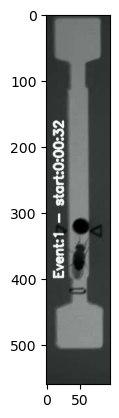

In [17]:
# Get the first video, load it and display the first frame rotated by 270 degrees

exvid = List[0]

# Load the first frame from the video
cap = cv2.VideoCapture(exvid)
ret, frame = cap.read()

# Rotate the frame by 270 degrees
frame_rot = cv2.rotate(frame, cv2.ROTATE_90_COUNTERCLOCKWISE)

plt.imshow(frame_rot)

In [22]:
import subprocess

# Ensure the output folder exists
output_folder = Path(
    "/mnt/upramdya_data/_Tracking_models/Sleap/mazerecorder/FlyTracking/FullBody/InteractionVideosLabel"
)
output_folder.mkdir(parents=True, exist_ok=True)

# For each video in the list, rotate it by 270 degrees and save it in the output folder using ffmpeg from the command line
for vid in List:
    # Get the video name
    vidname = Path(vid).name
    # Get the output path
    outpath = output_folder / vidname
    # Rotate the video by 270 degrees and save it in the output folder
    subprocess.run(
        ["ffmpeg", "-y", "-i", vid, "-vf", "transpose=2", str(outpath)], check=True
    )

ffmpeg version 4.3.2 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 10.3.0 (GCC)
  configuration: --prefix=/home/conda/feedstock_root/build_artifacts/ffmpeg_1645955405450/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_plac --cc=/home/conda/feedstock_root/build_artifacts/ffmpeg_1645955405450/_build_env/bin/x86_64-conda-linux-gnu-cc --disable-doc --disable-openssl --enable-avresample --enable-gnutls --enable-gpl --enable-hardcoded-tables --enable-libfreetype --enable-libopenh264 --enable-libx264 --enable-pic --enable-pthreads --enable-shared --disable-static --enable-version3 --enable-zlib --enable-libmp3lame --pkg-config=/home/conda/feedstock_root/build_artifacts/ffmpeg_1645955405450/_build_env/bin/pkg-config
  libavutil      56. 51.100 / 56. 51.100
  libavcodec     58. 91.100 / 58. 91.100
  libavformat    58. 45.100 / 58. 45.100
  l

list = [""]

In [63]:
# Add the rotated videos to the labels
for vid in output_folder.rglob("*.mp4"):
    video = sleap.Video.from_filename(vid.as_posix())
    
    labels.add_video(video)
    
labels.videos

[Video(backend=MediaVideo(filename='/mnt/upramdya_data/_Tracking_models/Sleap/mazerecorder/FlyTracking/FullBody/231129_TNT_Fine_2_Videos_Tracked/arena1/corridor1/corridor1.mp4', grayscale=True, bgr=True, dataset='', input_format='')),
 Video(backend=MediaVideo(filename='/mnt/upramdya_data/_Tracking_models/Sleap/mazerecorder/FlyTracking/FullBody/231129_TNT_Fine_2_Videos_Tracked/arena2/corridor2/corridor2.mp4', grayscale=True, bgr=True, dataset='', input_format='')),
 Video(backend=MediaVideo(filename='/mnt/upramdya_data/_Tracking_models/Sleap/mazerecorder/FlyTracking/FullBody/231129_TNT_Fine_2_Videos_Tracked/arena3/corridor5/corridor5.mp4', grayscale=True, bgr=True, dataset='', input_format='')),
 Video(backend=MediaVideo(filename='/mnt/upramdya_data/_Tracking_models/Sleap/mazerecorder/FlyTracking/FullBody/231129_TNT_Fine_2_Videos_Tracked/arena4/corridor3/corridor3.mp4', grayscale=True, bgr=True, dataset='', input_format='')),
 Video(backend=MediaVideo(filename='/mnt/upramdya_data/_Trac

In [65]:
import sleap.instance
from pathlib import Path
import sleap.io.video


# Function to rotate labels by 270 degrees clockwise (transpose=2)
def rotate_labels(labels, frame_width, frame_height):
    for instance in labels:
        for node in instance.points:
            original_x, original_y = node.x, node.y
            # Apply the 270-degree clockwise rotation
            node.x = original_y
            node.y = frame_width - original_x
            print(f"Rotated point to: ({node.x}, {node.y})")
    return labels


# Ensure the output folder exists
output_folder = Path(
    "/mnt/upramdya_data/_Tracking_models/Sleap/mazerecorder/FlyTracking/FullBody/InteractionVideosLabel"
)

frames = labels.labeled_frames

# Generate rotated labels and add them to the corresponding rotated videos
for src_vid in List:

    print(f"Processing video: {src_vid}")
    # Get the index of the video
    idx = List.index(src_vid)

    print(f"Index: {idx}")

    # Load the labels for the video and keep track of frame indices
    src_labels_with_indices = [
        (frame.frame_idx, instance)
        for frame in frames
        if frame.video.filename == src_vid
        for instance in frame.instances
    ]

    print(f"Found labels: {len(src_labels_with_indices)}")

    # Separate the indices and the instances
    frame_indices, src_labels = zip(*src_labels_with_indices)

    # Load the video to get frame dimensions
    # Load first frame from the video
    cap = cv2.VideoCapture(src_vid)
    ret, frame = cap.read()
    # Get the frame dimensions

    frame_height, frame_width, _ = frame.shape

    print(f"Frame dimensions: width={frame_width}, height={frame_height}")

    # Rotate the labels
    rotated_labels = rotate_labels(src_labels, frame_width, frame_height)

    # Find the associated rotated video
    rotated_vid_name = Path(src_vid).name
    rotated_vid_path = output_folder / rotated_vid_name
    rotated_video = next(
        (vid for vid in labels.videos if vid.filename == rotated_vid_path.as_posix()),
        None,
    )

    print(f"Found rotated video: {rotated_video}")

    if rotated_video:
        for frame_idx, instance in zip(frame_indices, rotated_labels):
            # Add the rotated labels and associate them with the rotated video
            labels.labeled_frames.append(
                sleap.instance.LabeledFrame(
                    video=rotated_video, frame_idx=frame_idx, instances=[instance]
                )
            )

    print(f"Added labels: {len(rotated_labels)}")

    # Remove the source video from the labels
    # labels.remove_video(src_vid)

# Save the updated labels
labels.save(
    "/mnt/upramdya_data/_Tracking_models/Sleap/mazerecorder/FlyTracking/FullBody/NewLabels.slp"
)

Processing video: /mnt/upramdya_files/DURRIEU_Matthias/Videos/240129_TNT_Fine/PR/231213_TNT_Fine_1_Videos_Tracked_arena1_corridor4_PR.mp4
Index: 0
Found labels: 10
Frame dimensions: width=560, height=96
Rotated point to: (53.219157533881486, 343.02315215493786)
Rotated point to: (53.802130499088406, 353.3655880640717)
Rotated point to: (49.007419766829024, 373.64278151191496)
Rotated point to: (55.19540173575242, 332.5369828218317)
Rotated point to: (36.34803926404848, 330.6140799810901)
Rotated point to: (63.039362964041594, 359.77231524083027)
Rotated point to: (35.522583715369464, 354.7013015928991)
Rotated point to: (62.95784393856753, 379.1162283039579)
Rotated point to: (34.16718642538068, 381.9429280441742)
Rotated point to: (51.70544768892454, 389.82487956596975)
Rotated point to: (46.07014813731429, 386.58895999917456)
Rotated point to: (47.513048364185806, 369.39419796204606)
Rotated point to: (47.06967689063662, 378.4339021385355)
Rotated point to: (47.316370359130545, 398.4

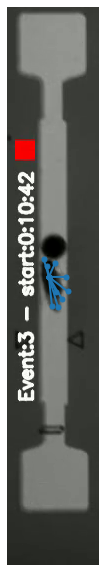

In [66]:
# Get one of the new instances

Testlab = labels.labeled_frames[-1].instances[0]

# Display the frame with the instance

labels.labeled_frames[-1].plot()